# Show contributions to ComBind Score in a Heiracrchical Fashion

In [1]:
from scoring import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
prot = 'TRPV1'
stats = 'stats21/stats'
scores = 'stats21/best_affinity_diverse/standard/20-1.0-mcss_contact_hbond_sb'
fname = '5IRX_lig-to-3J5Q.sc'
struct = '3J5Q'

print('results {0}/scores/{1}/{2}, {0}, {3}, confgen_es4'.format(prot, scores, fname, struct))

cluster, glide_cluster, best_cluster, sc = load(prot, stats, scores, fname, struct)

results TRPV1/scores/stats21/best_affinity_diverse/standard/20-1.0-mcss_contact_hbond_sb/5IRX_lig-to-3J5Q.sc, TRPV1, 3J5Q, confgen_es4


# Statistics for calculation

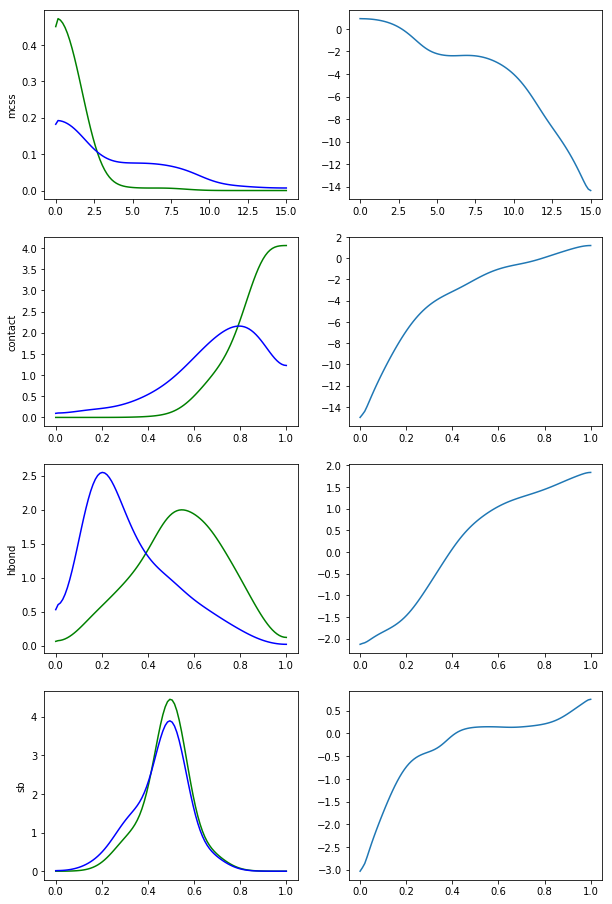

In [3]:
stats_plot(sc)

# Interactions

ComBind v. Glide for sb


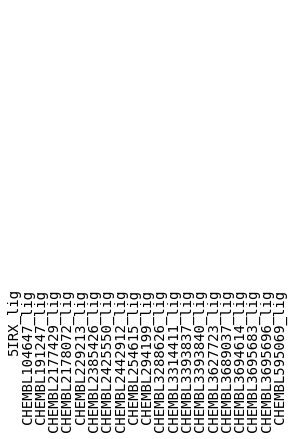

ComBind - Glide: 0.0
ComBind v. Best for sb


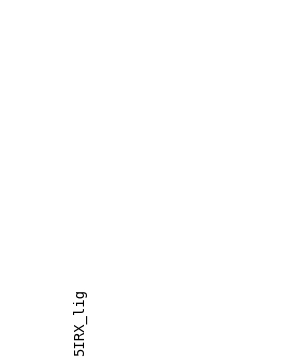

ComBind - Glide: 0.0
ComBind v. Glide for hbond


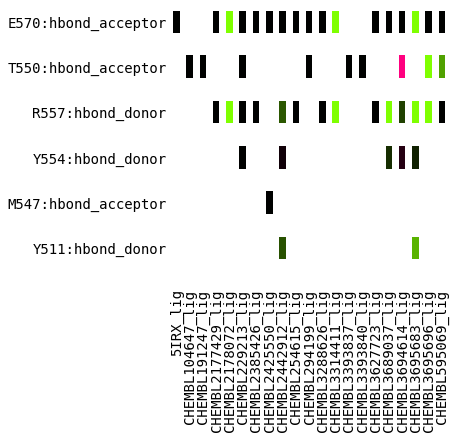

ComBind - Glide: 8.378355900065914
ComBind v. Best for hbond


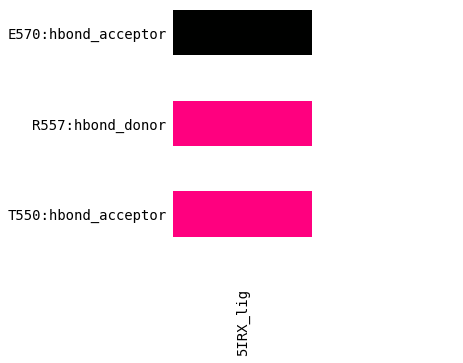

ComBind - Glide: -1.7022370230495243
ComBind v. Glide for contact


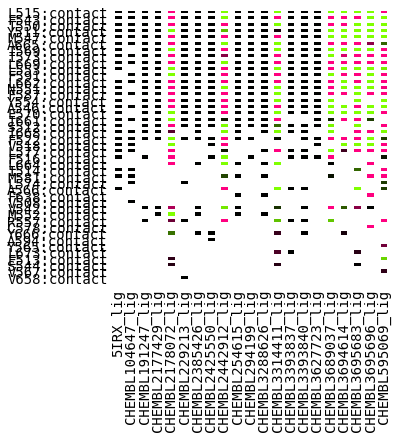

ComBind - Glide: -163.35675033848418
ComBind v. Best for contact


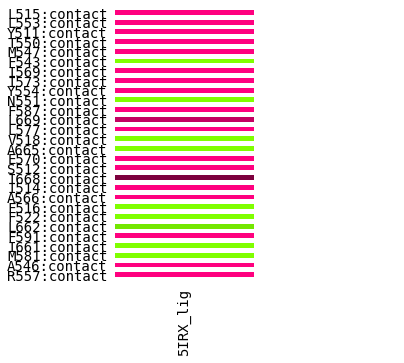

ComBind - Glide: -26.73000155402198


In [8]:
ligands = list(cluster)
for feature in ['sb', 'hbond', 'contact']:
    print('ComBind v. Glide for {}'.format(feature))
    sc.ps.gel_plot(cluster, {k: 0 for k, v in cluster.items()}, feature, ligands)
    print('ComBind v. Best for {}'.format(feature))
    sc.ps.gel_plot(cluster, best_cluster, feature, ['5IRX_lig'])

# Energy Differences

Cluster1 - Cluster2 = 57.12879380800867 for mcss


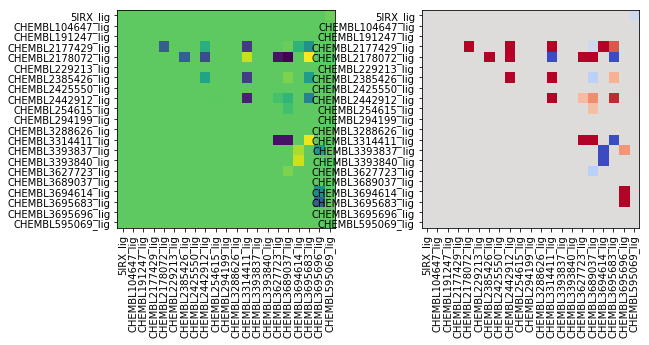

Cluster1 - Cluster2 = 93.56697942417776 for contact


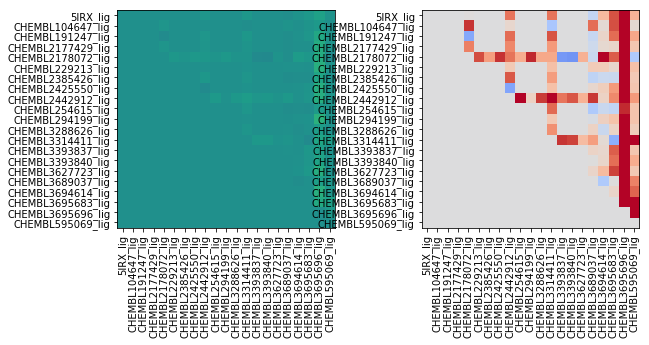

Cluster1 - Cluster2 = 84.30538928840556 for hbond


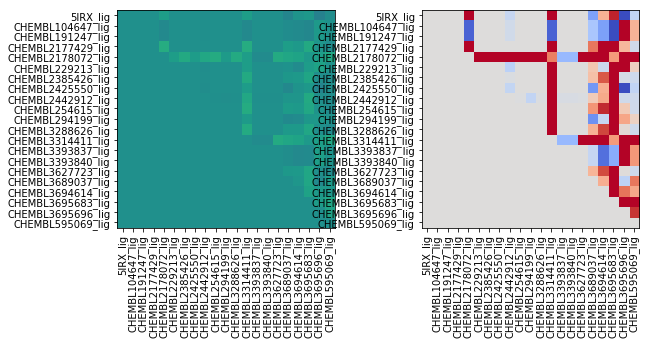

Cluster1 - Cluster2 = 0.0 for sb


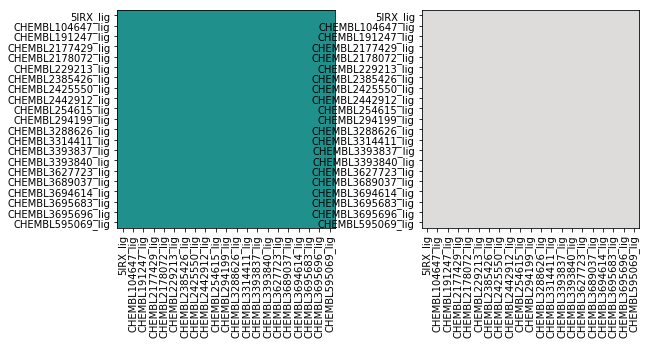

In [5]:
energy_plot(cluster, glide_cluster, sc)

Cluster1 - Cluster2 = -3.16349955430857 for mcss


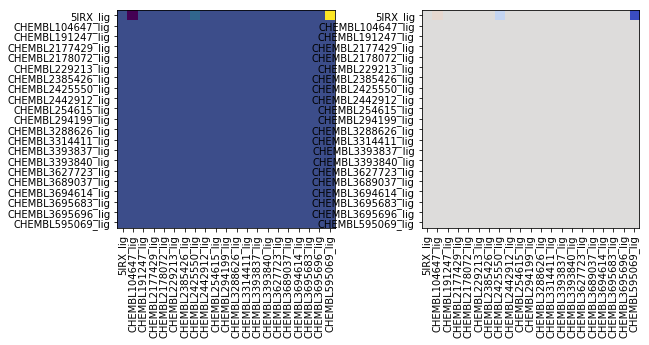

Cluster1 - Cluster2 = 3.043838878750731 for contact


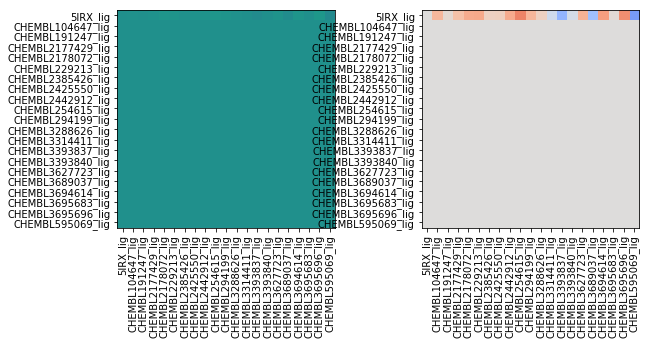

Cluster1 - Cluster2 = -10.927843723171906 for hbond


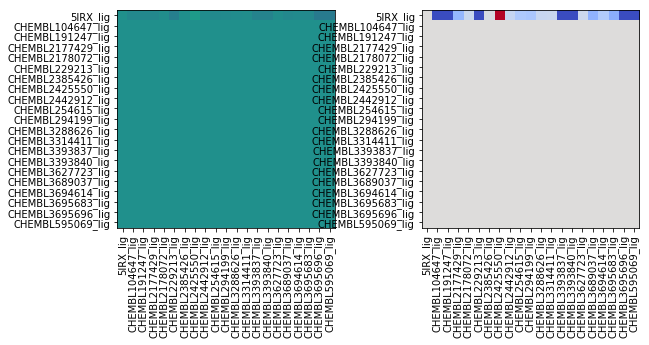

Cluster1 - Cluster2 = 0.0 for sb


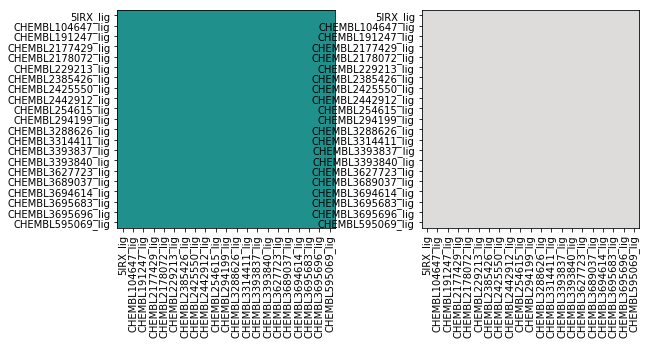

In [27]:
# Likelihood of ComBind - best in context of ComBind

ligand = '5IRX_lig'
pose = 5
mut = {k:v for k, v in cluster.items()}
mut[ligand] = pose

energy_plot(cluster, mut, sc)

In [17]:
for i, pose in enumerate(sc.predict_data.docking['3J5Q'].ligands['5IRX_lig'].poses):
    print(i, pose.gscore, pose.rmsd)

0 -7.15 5.35689422109
1 -7.08 5.31254353643
2 -7.07 5.34544577052
3 -6.63 5.22789640153
4 -6.05 1.35787677326
5 -6.0 1.31619270445
6 -6.0 7.94245977396
7 -5.9 1.33944447194
8 -5.75 1.34087653689
9 -5.67 8.05588120257
10 -5.46 6.00658680481
11 -5.42 6.15608703505
12 -5.25 6.24231827641
13 -5.24 7.09580163905
14 -5.19 8.45426302168
15 -5.12 8.18755797822
16 -5.09 6.63329692884
17 -5.09 6.63329692884
18 -5.09 6.63329692884
19 -4.96 6.35090535271
20 -4.95 6.33414009352
21 -4.93 6.29336391283
22 -4.91 8.60514169973
23 -4.81 6.96321719182
24 -4.81 6.30073798651
25 -4.81 8.4050636777
26 -4.77 8.9182892432
27 -4.71 7.00689942508
28 -4.71 8.59431780922
29 -4.69 8.17856697757
30 -4.6 8.5595771208
31 -4.59 6.4565802481
32 -4.58 8.17907568716
33 -4.58 8.1422025461
34 -4.58 6.90857826673
35 -4.57 8.38213265346
36 -4.55 8.09698922756
37 -4.51 8.43770172708
38 -4.51 7.92406039569
39 -4.49 8.63800330794
40 -4.48 7.3996394563
41 -4.48 8.04009163837
42 -4.46 8.17170601251
43 -4.38 7.12647312704
44 -4.38

In [26]:
sc.ps.log_likelihood_ratio_cache = {}
sc.ps.alpha = 0.48
sc.ps._best_pose(cluster, '5IRX_lig', 0)

5